In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

/opt/ds/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
hs = pd.read_csv('hearthstone.csv')

In [3]:
hs['value'] = (hs.win.apply(lambda x: 1. if x else -1.))
won = hs['win'] == True
is_hunter = hs['my class'] == 'Hunter'
is_druid = hs['my class'] == 'Druid'

In [63]:
def plot_values(my_class_predicate):
    # A = win == True
    # B = opponent class == hunter (for instance)
    # P(A|B) = P(A and B) / P(B)
    # P(A and B) = hs[is_druid][won][against_hunter]
    # P(B) = hs[is_druid][against_hunter]
    grp = hs[my_class_predicate].groupby(['opponent class'])
    won_grp = hs[my_class_predicate][won].groupby(['opponent class'])
    total = len(hs[my_class_predicate])

    # Batch P(B): P(B) for every opponent class
    Pb = grp['opponent class'].count()/total
    #print("P(B): %s" % Pb)
    print("Total: %s" % sum(Pb))

    # Batch P(A and B): P(A and B) for every opponent class
    Pa_and_b = won_grp.win.count()/total
    #print("P(A and B): %s" % Pa_and_b)
    print("Total: %s" % sum(Pa_and_b))

    assert sum(Pb) - 1.0 < 1e-10
    assert sum(Pa_and_b) - 1.0 < 1e-10
    
    P_winning_against = Pa_and_b.div(Pb, fill_value=0.0)
    print("P(A|B): %s" % P_winning_against)
    print('Expected value %s' % sum(P_winning_against))
    ax = P_winning_against.plot(kind='bar')
    ax.axhline(y=hs[my_class_predicate].win.mean(), c='r')
    ax.axhline(y=P_winning_against.mean(), c='y')
    return ax

Total: 1.0
Total: 0.460526315789
P(A|B): opponent class
Druid      0.500000
Hunter     0.333333
Mage       0.142857
Paladin    0.500000
Priest     0.454545
Rogue      1.000000
Shaman     0.500000
Warlock    0.666667
Warrior    0.200000
dtype: float64
Expected value 4.2974025974


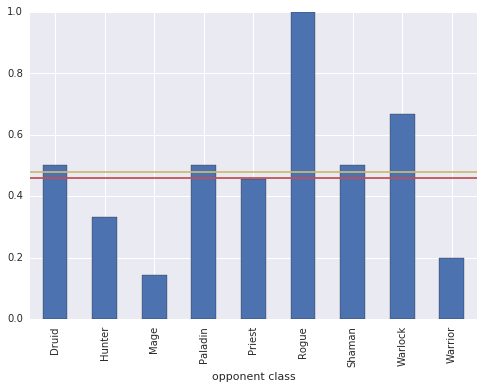

In [64]:
plot_values(is_druid)

Total: 1.0
Total: 0.47619047619
P(A|B): opponent class
Druid      0.000
Hunter     1.000
Mage       0.500
Paladin    0.375
Priest     0.500
Rogue      1.000
Shaman     0.500
Warrior    0.000
dtype: float64
Expected value 3.875


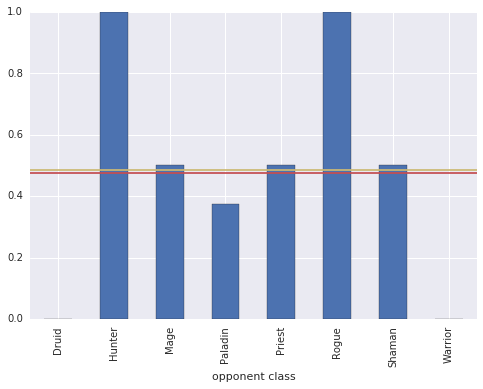

In [65]:
plot_values(is_hunter)

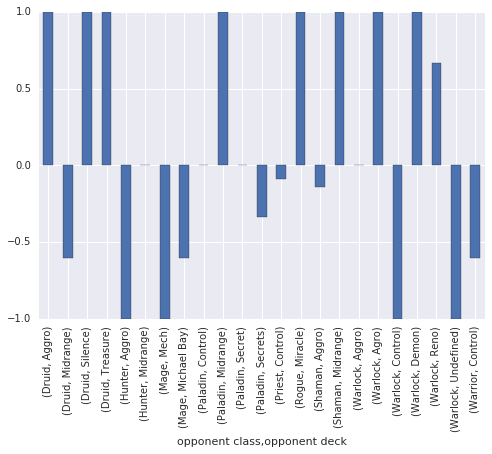

In [66]:
hs[is_druid].groupby(['opponent class', 'opponent deck'])['value'].mean().plot(kind='bar')